# What's Cooking? in Kaggle

## 1. 데이터 및 패키지 불러오기

In [92]:
import pandas as pd
import numpy as np
import collections
from tqdm import tqdm_notebook

import re

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### 데이터 확인

In [2]:
train = pd.read_json('train.json')

In [3]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [5]:
for ing in tqdm_notebook(range(len(train))):
    n_recipe = train.ingredients[ing]
    for n_ing in range(len(n_recipe)):
        n_recipe[n_ing] = n_recipe[n_ing].lower()

In [6]:
test = pd.read_json('test.json')

In [7]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


In [9]:
for ing in tqdm_notebook(range(len(test))):
    n_recipe = test.ingredients[ing]
    for n_ing in range(len(n_recipe)):
        n_recipe[n_ing] = n_recipe[n_ing].lower()

## 2. EDA

In [10]:
print('데이터에서 언급된 국가의 수는 {}개국'.format(train.cuisine.nunique()))
print('데이터에서 언급된 레시피의 수는 {}개'.format(len(train.cuisine)))

데이터에서 언급된 국가의 수는 20개국
데이터에서 언급된 레시피의 수는 39774개


In [11]:
unique_ing = []

for recipe in train.ingredients:
    for ing in range(len(recipe)):
        unique_ing.append(recipe[ing])
        
nuni_ing = pd.Series(unique_ing).nunique()

In [12]:
print('레시피에서 언급된 재료의 개수는 {}개'.format(len(unique_ing)))
print('레시피에서 언급된 유니크한 재료의 개수는 {}개'.format(nuni_ing))

레시피에서 언급된 재료의 개수는 428275개
레시피에서 언급된 유니크한 재료의 개수는 6703개


#### Cuisine

In [47]:
cui = [c for c in train.cuisine]

In [49]:
count_cui = collections.Counter(cui)

In [50]:
count_cui

Counter({'greek': 1175,
         'southern_us': 4320,
         'filipino': 755,
         'indian': 3003,
         'jamaican': 526,
         'spanish': 989,
         'italian': 7838,
         'mexican': 6438,
         'chinese': 2673,
         'british': 804,
         'thai': 1539,
         'vietnamese': 825,
         'cajun_creole': 1546,
         'brazilian': 467,
         'french': 2646,
         'japanese': 1423,
         'irish': 667,
         'korean': 830,
         'moroccan': 821,
         'russian': 489})

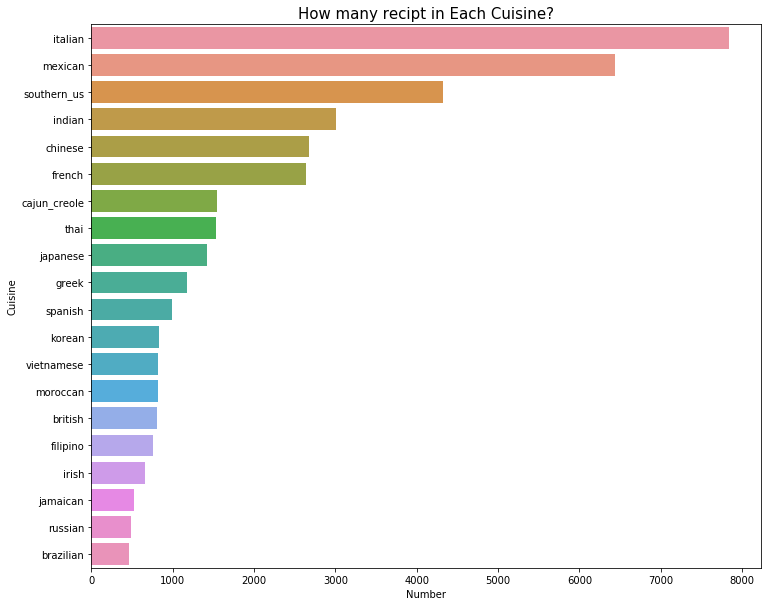

In [64]:
x_t = [c for c,n in count_cui.most_common()]
y_t = [n for c,n in count_cui.most_common()]

plt.figure(figsize = (12,10))
plt.title('How many recipt in Each Cuisine?', size = 15)
sns.barplot(y = x_t, x = y_t)
plt.xlabel('Number')
plt.ylabel('Cuisine')
plt.show()

#### Ingredients

In [14]:
def num_of_ing(x):
    return len(x)

In [15]:
train['재료개수'] = train.ingredients.map(num_of_ing)

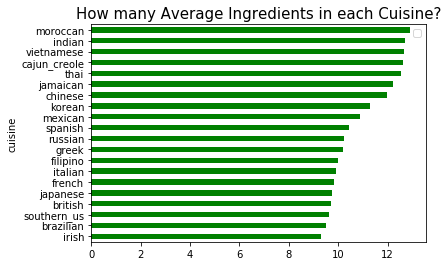

In [70]:
train.groupby('cuisine').재료개수.agg({'평균개수' : 'mean'}).sort_values(by = '평균개수').plot(kind = 'barh', color = 'g')
plt.legend('')
plt.title('How many Average Ingredients in each Cuisine?', size = 15)
plt.show()

### 전체 국가의 Top 20 Ingredients & Bottom 20 Ingredients

In [17]:
count_ing = collections.Counter(unique_ing)

In [18]:
count_ing.most_common(20)

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782)]

In [71]:
count_ing.most_common()[-10:]

[('oscar mayer cotto salami', 1),
 ('challenge butter', 1),
 ('orange glaze', 1),
 ('cholesterol free egg substitute', 1),
 ('ciabatta loaf', 1),
 ('lipton짰 iced tea brew family size tea bags', 1),
 ('hidden valley짰 greek yogurt original ranch짰 dip mix', 1),
 ('lop chong', 1),
 ('tomato garlic pasta sauce', 1),
 ('crushed cheese crackers', 1)]

### 국가별 Top 20 Ingredients

In [20]:
cui_ing = train.groupby('cuisine')['ingredients'].sum().reset_index()

In [21]:
cui_ing.head()

,cuisine,ingredients
0,brazilian,"[ice cubes, club soda, white rum, lime, turbin..."
1,british,"[greek yogurt, lemon curd, confectioners sugar..."
2,cajun_creole,"[herbs, lemon juice, fresh tomatoes, paprika, ..."
3,chinese,"[low sodium soy sauce, fresh ginger, dry musta..."
4,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."


In [22]:
df = pd.DataFrame()
for c in tqdm_notebook(range(len(cui_ing))):
    cui_ing_lst = list(cui_ing.ingredients[c])
    count_cui_ing = collections.Counter(cui_ing_lst)
    ing_lst = []
    for i in range(20):
        ing_lst.append(count_cui_ing.most_common(20)[i][0])
    df[cui_ing.cuisine[c]] = ing_lst
    print('{} 나라의 Top 20 재료는\n{}'.format(cui_ing.cuisine[c], ing_lst))
    print('#'*40)

brazilian 나라의 Top 20 재료는
['salt', 'onions', 'olive oil', 'lime', 'water', 'garlic cloves', 'garlic', 'cachaca', 'sugar', 'tomatoes', 'coconut milk', 'sweetened condensed milk', 'pepper', 'eggs', 'butter', 'ground black pepper', 'milk', 'vegetable oil', 'black beans', 'bay leaves']
########################################
british 나라의 Top 20 재료는
['salt', 'all-purpose flour', 'butter', 'milk', 'eggs', 'unsalted butter', 'sugar', 'onions', 'baking powder', 'large eggs', 'water', 'heavy cream', 'pepper', 'flour', 'baking soda', 'ground black pepper', 'potatoes', 'kosher salt', 'carrots', 'vanilla extract']
########################################
cajun_creole 나라의 Top 20 재료는
['salt', 'onions', 'garlic', 'green bell pepper', 'butter', 'olive oil', 'cayenne pepper', 'cajun seasoning', 'all-purpose flour', 'water', 'garlic cloves', 'ground black pepper', 'green onions', 'celery', 'vegetable oil', 'dried thyme', 'andouille sausage', 'bay leaves', 'creole seasoning', 'shrimp']
###################

In [23]:
cui_ing_df = df.T

In [24]:
cui_ing_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
brazilian,salt,onions,olive oil,lime,water,garlic cloves,garlic,cachaca,sugar,tomatoes,coconut milk,sweetened condensed milk,pepper,eggs,butter,ground black pepper,milk,vegetable oil,black beans,bay leaves
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs,water,heavy cream,pepper,flour,baking soda,ground black pepper,potatoes,kosher salt,carrots,vanilla extract
cajun_creole,salt,onions,garlic,green bell pepper,butter,olive oil,cayenne pepper,cajun seasoning,all-purpose flour,water,garlic cloves,ground black pepper,green onions,celery,vegetable oil,dried thyme,andouille sausage,bay leaves,creole seasoning,shrimp
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions,ginger,fresh ginger,rice vinegar,garlic cloves,oil,oyster sauce,hoisin sauce,carrots,eggs,onions
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper,fish sauce,bay leaves,vegetable oil,eggs,cooking oil,garlic cloves,brown sugar,coconut milk,vinegar,green onions
french,salt,sugar,all-purpose flour,unsalted butter,olive oil,butter,water,large eggs,garlic cloves,ground black pepper,onions,shallots,extra-virgin olive oil,dry white wine,fresh lemon juice,large egg yolks,carrots,vanilla extract,garlic,heavy cream
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper,feta cheese,cucumber,purple onion,onions,lemon juice,tomatoes,water,lemon,fresh parsley,fresh dill
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil,ginger,tomatoes,tumeric,chili powder,green chilies,garlic cloves,curry powder,ground coriander,fresh ginger,olive oil
irish,salt,all-purpose flour,butter,onions,sugar,potatoes,baking soda,baking powder,milk,carrots,water,eggs,pepper,unsalted butter,large eggs,buttermilk,ground black pepper,cabbage,garlic,olive oil
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter,pepper,all-purpose flour,fresh basil,sugar,dry white wine,kosher salt,black pepper,fresh parsley,eggs,dried oregano


## 3. Word2Vec

In [25]:
from gensim.models import word2vec

In [132]:
text = []

for recipt in train.ingredients:
    cleansing_lst = []
    for ing in recipt:
        comp = re.sub(r'\(.*oz.\)|crushed|crumbles|ground|minced|powder|chopped|sliced',
                             '', 
                             ing)
        cleansing_lst.append(comp.strip())
    text.append(cleansing_lst)

In [146]:
# Set values for NN parameters
num_features = 200    # Word vector dimensionality                      
min_word_count = 5    # 50% of the corpus                    
num_workers = 4       # Number of CPUs
context = 10          # Context window size; 
                      # let's use avg recipte size                                                                                  
downsampling = 1e-3   # threshold for configuring which 
                    # higher-frequency words are randomly downsampled

# Initialize and train the model 
model = word2vec.Word2Vec(text, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

# If you don't plan to train the model any further, calling 
# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)

In [147]:
model.most_similar('sugar')

[('granulated sugar', 0.8132616877555847),
 ('light brown sugar', 0.7565581798553467),
 ('honey', 0.7086083292961121),
 ('brown sugar', 0.7003529071807861),
 ('dark brown sugar', 0.6895794868469238),
 ('raw cane sugar', 0.6765410900115967),
 ('caster sugar', 0.6752524375915527),
 ('firmly packed light brown sugar', 0.6385620832443237),
 ('superfine sugar', 0.6305127143859863),
 ('cold water', 0.6249930262565613)]

In [148]:
model.most_similar('onion')

[('diced onions', 0.8264183402061462),
 ('finely  onion', 0.8067150115966797),
 ('diced tomatoes', 0.7965415716171265),
 ('dried oregano', 0.7873558402061462),
 ('dried thyme', 0.7798694372177124),
 ('boneless skinless chicken breast halves', 0.7372629642486572),
 ('stewed tomatoes', 0.7321505546569824),
 ('green bell pepper', 0.7268590927124023),
 ('paprika', 0.7263374924659729),
 ('hot pepper sauce', 0.7231846451759338)]

In [149]:
model.wv.most_similar(positive=['garlic', 'onion'], negative=['rice'])

[('boneless skinless chicken breast halves', 0.69871985912323),
 ('dry bread crumbs', 0.66404128074646),
 ('sweet onion', 0.6637572050094604),
 ('finely  onion', 0.6433765888214111),
 ('chicken breast halves', 0.6186690330505371),
 ('red pepper', 0.6149535179138184),
 ('vegetable oil cooking spray', 0.6087453961372375),
 ('pimentos', 0.6070320010185242),
 ('dried rosemary', 0.6017584204673767),
 ('dried basil', 0.5918577313423157)]

## 4. T-SNE

In [31]:
from sklearn.manifold import TSNE

In [150]:
vocab = list(model.wv.vocab)
X = model[vocab]

In [151]:
tsne = TSNE(n_components = 2)

In [152]:
X_tsne = tsne.fit_transform(X)

In [153]:
tsne_df = pd.DataFrame(X_tsne, index = vocab, columns = ['x', 'y'])

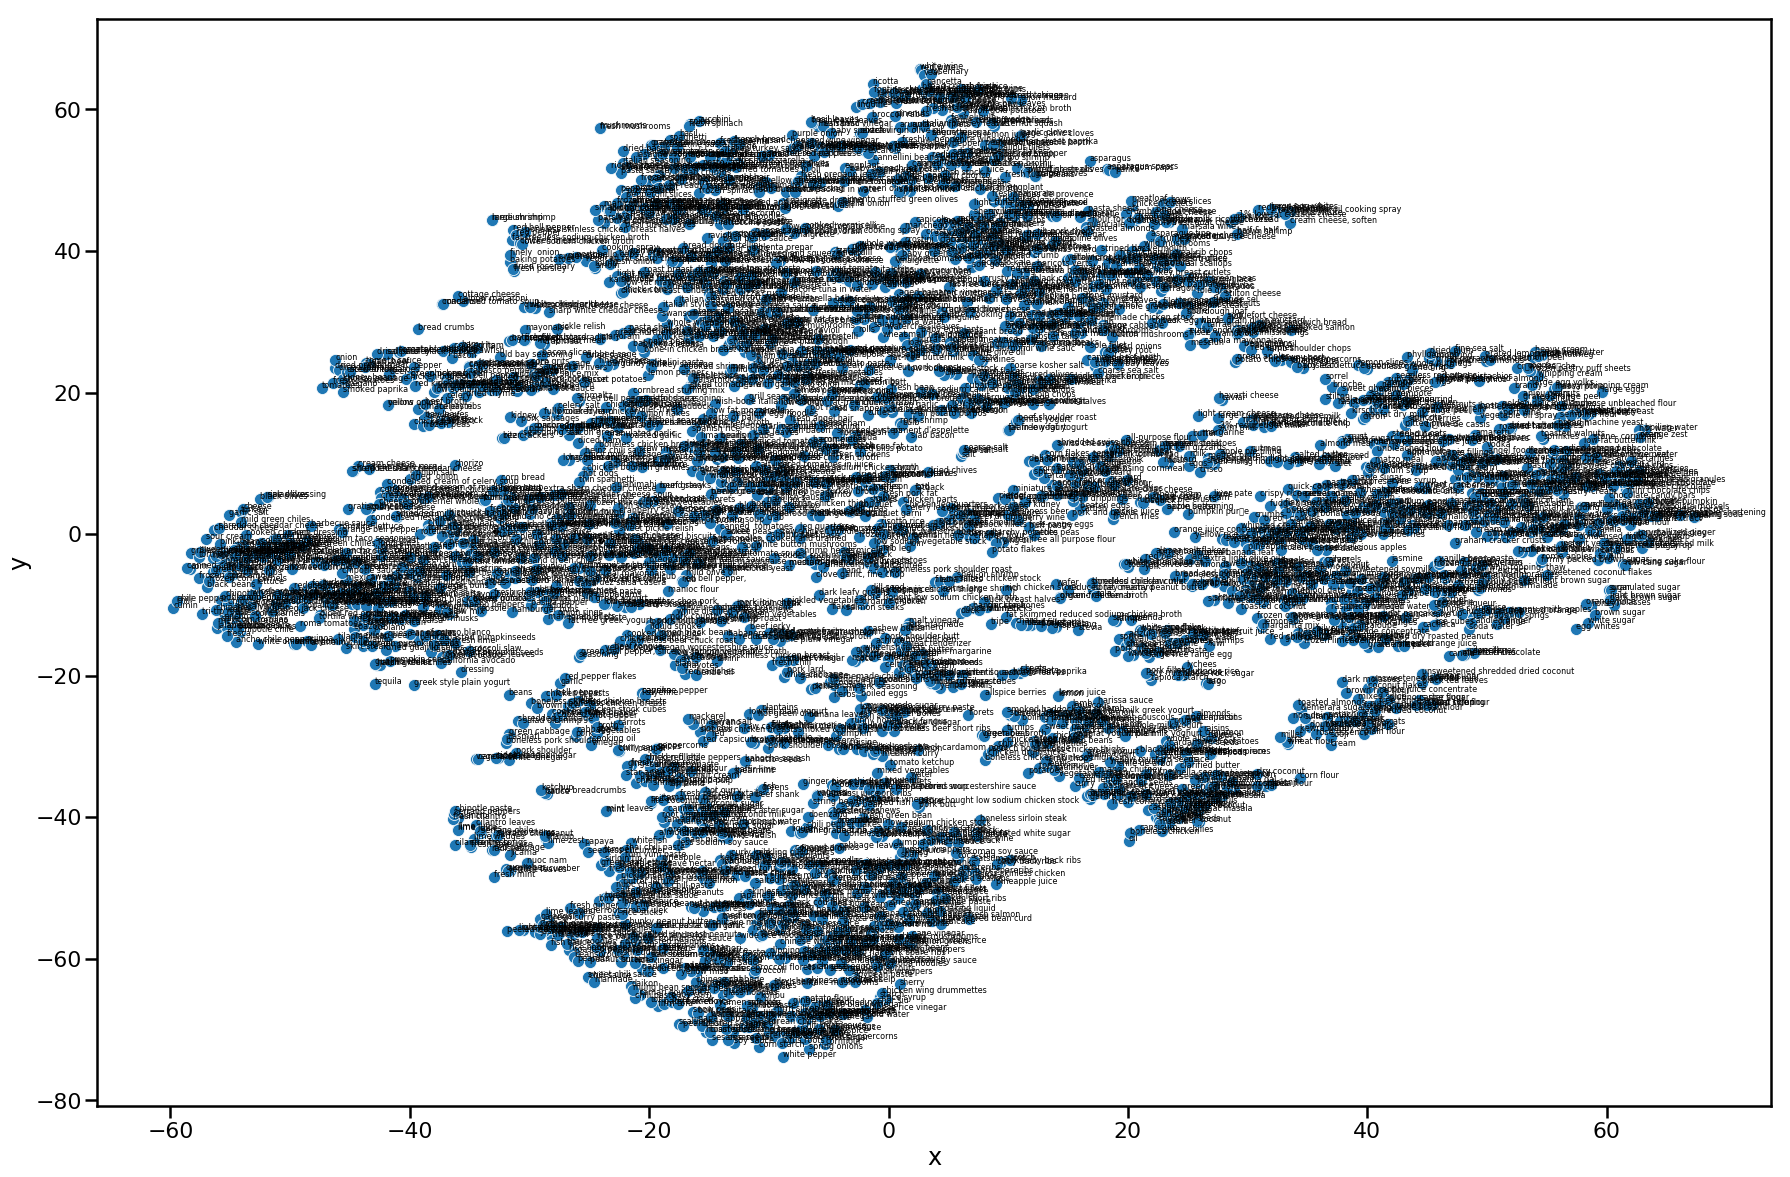

In [155]:
plt.figure(figsize = (30,20))
#plt.set_size_inches(60,30)
sns.scatterplot(tsne_df['x'], tsne_df['y'])
for word, pos in list(tsne_df.iterrows()):
    plt.annotate(word, pos, fontsize = 8)
plt.show()

## 5. Classification

In [156]:
from sklearn.preprocessing import LabelEncoder

In [157]:
LE = LabelEncoder()

In [158]:
train.cuisine = LE.fit_transform(train.cuisine)

In [220]:
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Flatten, BatchNormalization

In [163]:
X_train, X_test, y_train, y_test = train_test_split(train.ingredients, train.cuisine, test_size = 0.2)

In [247]:
tokenizer = Tokenizer(num_words = 1000)

In [248]:
tokenizer.fit_on_texts(X_train)

In [249]:
sequence = tokenizer.texts_to_sequences(X_train)

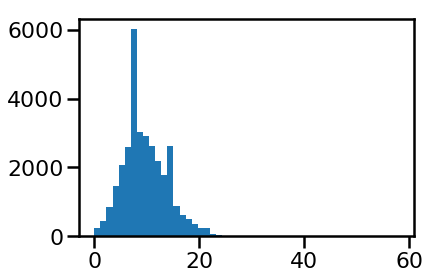

최대길이 58


In [250]:
plt.hist([len(s) for s in sequence], bins = 50)
plt.show()

print('최대길이 %d' % max(len(s) for s in sequence))

In [254]:
seq_matrix = pad_sequences(sequence, maxlen = 25)

In [255]:
def RNN():
    inputs = Input(name='inputs',shape=[25])
    layer = Embedding(1000,50,input_length=25)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(64)(layer)
    layer = Activation('relu')(layer)
    layer = Dense(64)(layer)
    layer = Activation('relu')(layer)
    #layer = Dropout(0.5)(layer)
    layer = BatchNormalization()(layer)
    #layer = Flatten()(layer)
    layer = Dense(20,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [256]:
model = RNN()
model.summary()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 25)                0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 25, 50)            50000     
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_31 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_45 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_46 (Activation)   (None, 64)                0         
__________

In [257]:
history = model.fit(seq_matrix, y_train, batch_size = 128, epochs = 30,
                   validation_split= .1, callbacks= [EarlyStopping(monitor='val_acc',mode = 'max',patience = 5)],
                   verbose = 2)

Train on 28637 samples, validate on 3182 samples
Epoch 1/30
 - 9s - loss: 1.4506 - acc: 0.5871 - val_loss: 1.1652 - val_acc: 0.6386
Epoch 2/30
 - 7s - loss: 0.9452 - acc: 0.7182 - val_loss: 1.0981 - val_acc: 0.6788
Epoch 3/30
 - 7s - loss: 0.8470 - acc: 0.7434 - val_loss: 1.0825 - val_acc: 0.6838
Epoch 4/30
 - 7s - loss: 0.7912 - acc: 0.7574 - val_loss: 0.9836 - val_acc: 0.7175
Epoch 5/30
 - 7s - loss: 0.7471 - acc: 0.7688 - val_loss: 1.1843 - val_acc: 0.6757
Epoch 6/30
 - 7s - loss: 0.7169 - acc: 0.7770 - val_loss: 1.0639 - val_acc: 0.6936
Epoch 7/30
 - 8s - loss: 0.6883 - acc: 0.7827 - val_loss: 0.9796 - val_acc: 0.7219
Epoch 8/30
 - 7s - loss: 0.6608 - acc: 0.7930 - val_loss: 0.9990 - val_acc: 0.7187
Epoch 9/30
 - 8s - loss: 0.6415 - acc: 0.7984 - val_loss: 0.9953 - val_acc: 0.7209
Epoch 10/30
 - 8s - loss: 0.6188 - acc: 0.8027 - val_loss: 1.0096 - val_acc: 0.7099
Epoch 11/30
 - 8s - loss: 0.5990 - acc: 0.8060 - val_loss: 1.1512 - val_acc: 0.6970
Epoch 12/30
 - 8s - loss: 0.5777 - a

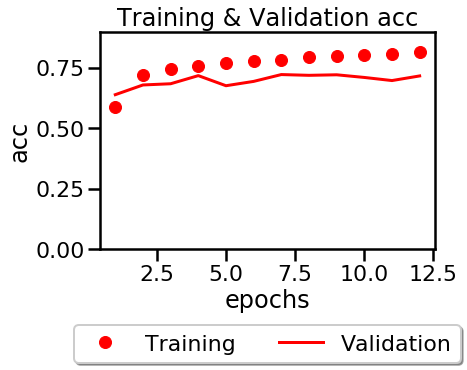

In [303]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'ro', label = 'Training')
plt.plot(epochs, val_acc, 'r', label = 'Validation')
plt.title('Training & Validation acc')
plt.ylim(0,0.9)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol = 2)
plt.xlabel('epochs')
plt.ylabel('acc')
plt.show()

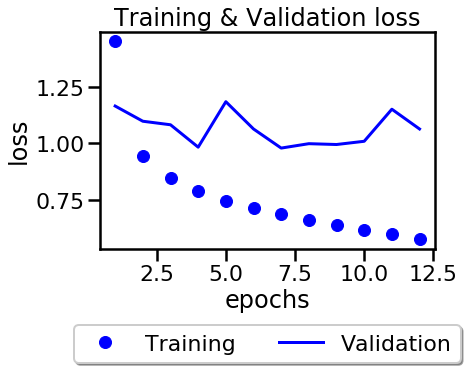

In [302]:
plt.plot(epochs, loss, 'bo', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training & Validation loss')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol = 2)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [258]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen = 25)

In [259]:
test_score = model.evaluate(test_sequences_matrix,y_test)

7955/7955 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 145us/step


In [260]:
print('Test set\nLoss: {:0.3f}\nAccuracy: {:0.3f}'.format(test_score[0], test_score[1]))

Test set
Loss: 1.029
Accuracy: 0.723


모델의 정확도는 약 72.3%

#### test.json 파일을 이용해 예측

In [261]:
seq = tokenizer.texts_to_sequences(test.ingredients)

In [262]:
seq_mat = pad_sequences(seq, maxlen = 25)

In [274]:
pred = model.predict(seq_mat)

In [286]:
pred_label = []

for c in tqdm_notebook(range(len(pred))):
    pred_label.append(np.argmax(pred[c]))

In [289]:
test['cuisine'] = pred_label

In [291]:
test.cuisine = LE.inverse_transform(test.cuisine)

In [293]:
test.head()

,id,ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",british
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",french
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",italian


In [311]:
x_c = [c for c, n in collections.Counter(test.cuisine).most_common()]
y_c = [n for c, n in collections.Counter(test.cuisine).most_common()]

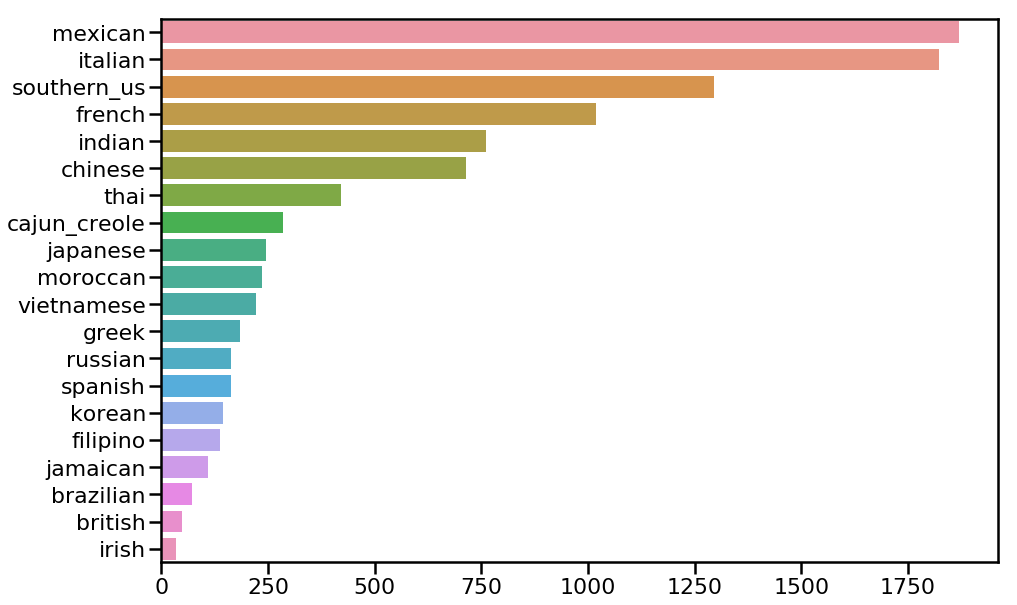

In [314]:
plt.figure(figsize = (15, 10))
sns.barplot(y = x_c, x = y_c )
plt.show()

# Finished!
